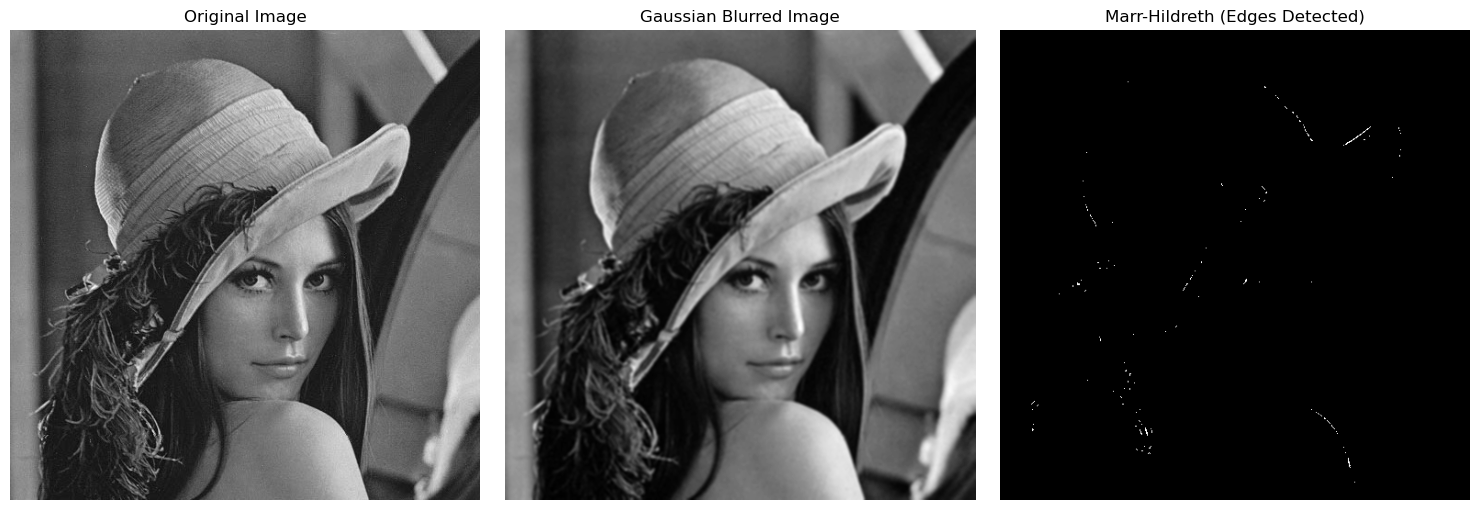

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded properly
if image is None:
    print("Error: Image could not be loaded.")
else:
    # Step 1: Apply Gaussian Blur
    blurred_image = cv2.GaussianBlur(image, (5, 5), sigmaX=1.4)

    # Step 2: Apply Laplacian Filter
    # Define a Laplacian kernel
    laplacian_kernel = np.array([
        [0,  1,  0],
        [1, -4,  1],
        [0,  1,  0]
    ])
    laplacian_image = cv2.filter2D(blurred_image, -1, laplacian_kernel)

    # Step 3: Approximate Zero-Crossings (threshold the Laplacian)
    _, edges = cv2.threshold(np.abs(laplacian_image), 20, 255, cv2.THRESH_BINARY)

    # Plot the images in a single row
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(blurred_image, cmap='gray')
    plt.title("Gaussian Blurred Image")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(edges, cmap='gray')
    plt.title("Marr-Hildreth (Edges Detected)")
    plt.axis("off")

    # Show the plot
    plt.tight_layout()
    plt.show()
